In [4]:
!pip3 install platypus
!pip3 install ema_workbench platypus-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.6 MB/s 
  Created wheel for platypus: filename=Platypus-1.0-py3-none-any.whl size=12131 sha256=42bc45946d0774bec5dbcbb752bc2ee50475980cca12b3f40908c217018a7d1d
  Stored in directory: /root/.cache/pip/wheels/6c/d7/9b/814f078a14758933a87a5d450635b9646932a685838eff281a
Successfully built platypus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.6 MB 1.5 MB/s 
     |████████████████████████████████| 70 kB 6.6 MB/s 
  Created wheel for ema-workbench: filename=ema_workbench-2.1.1-py3-none-any.whl size=24633718 sha256=0447731e98921fc5bc0b931bf523037f2345c6a571f5bcdf9d2bcf78b344710c
  Stored in directory: /root/.cache/pip/wheels/f3/d1/d9/98f5cfee98676446eca76b1bb2e696b61be879429ea3beb8d9
Successfully built ema-workbench


In [1]:
import sys
import os
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]
sys.path.append('..')

/Users/jhkwakkel/Documents/GitHub/EMAworkbench/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


In [2]:
import rbf_functions

In [3]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

#Load reference set for each RBF
pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"./refsets/"
    results = pd.read_csv(output_dir + name+ '_refset.csv')
    results['max_p'] = 2.5 - results['max_p'] ## swap for the max P value
    pareto_sets[name] = results


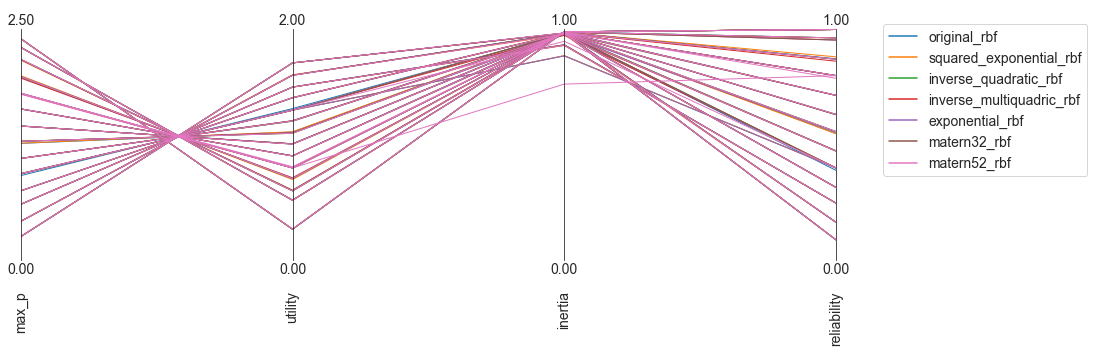

In [4]:
limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0,0,0,0]
limits.loc[1] = [2.5,2,1,1]
axes = ParallelAxes(limits)

sns.color_palette()

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=1, color=c, alpha=1)

axes.legend()

# plt.show()

original_rbf
squared_exponential_rbf
inverse_quadratic_rbf
inverse_multiquadric_rbf
exponential_rbf
matern32_rbf
matern52_rbf


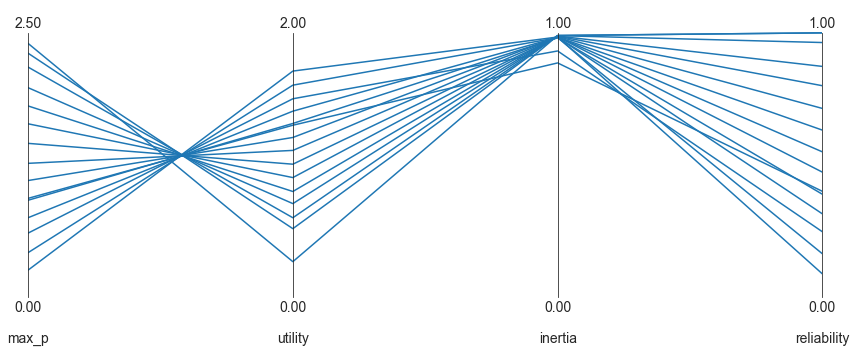

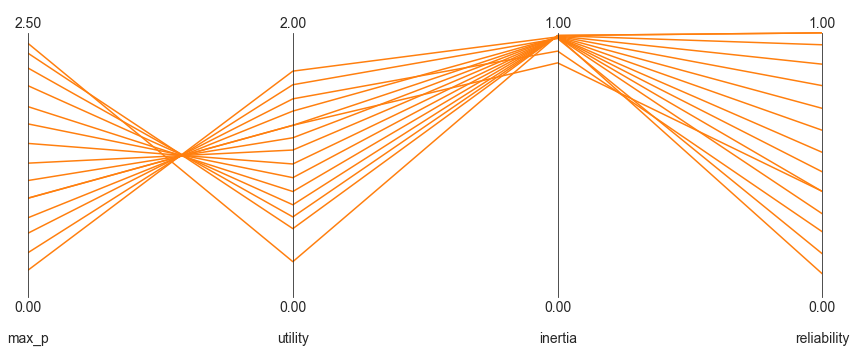

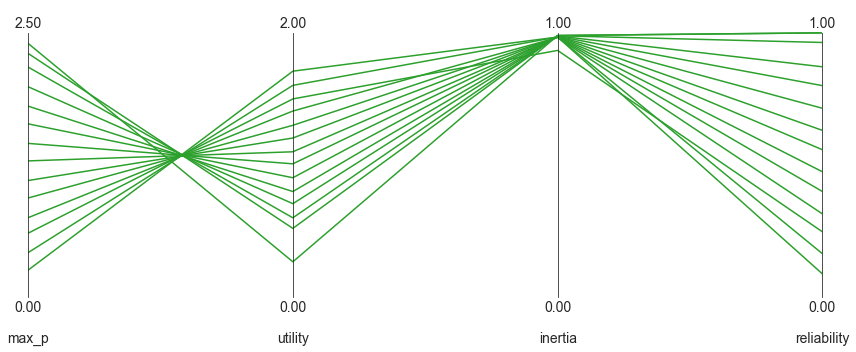

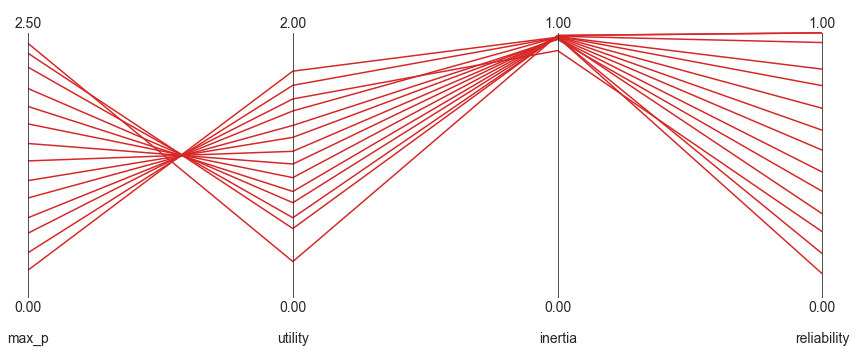

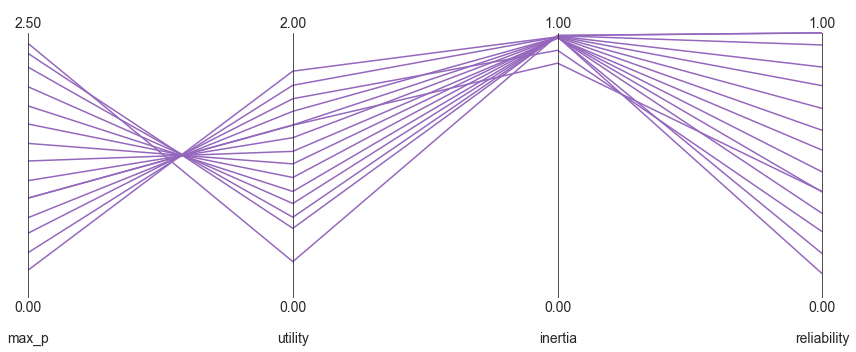

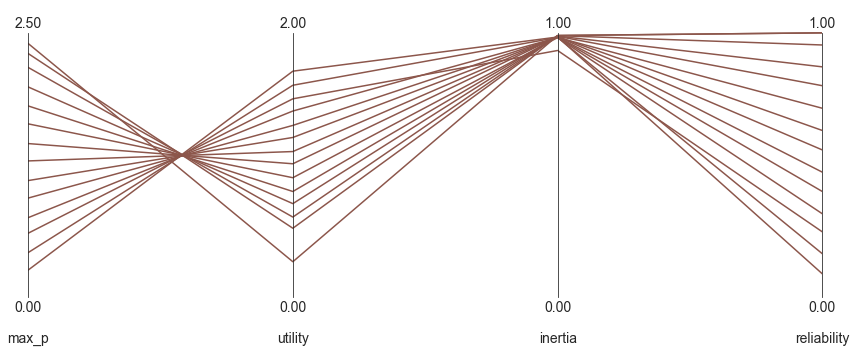

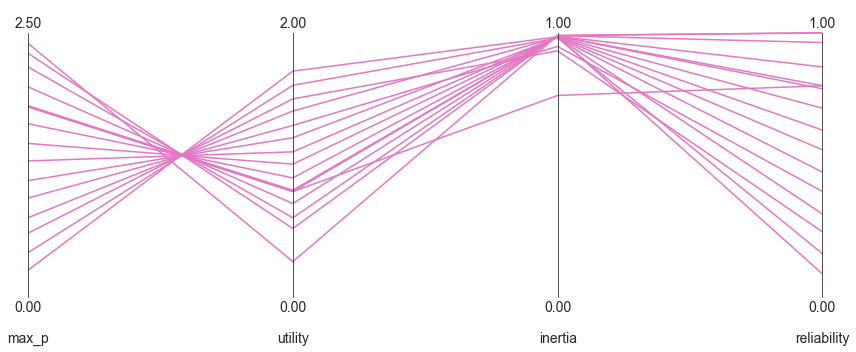

In [8]:
import os

limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0,0,0,0]
limits.loc[1] = [2.5,2,1,1]

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    directory = os.path.join(f'../figs/{k}')
    if not os.path.exists(directory):
        os.mkdir(directory)
                             
    
    
    print(k)
    axes = ParallelAxes(limits, rot=0)    
    axes.plot(v, label=k, lw=1.5, color=c, alpha=1)
#     axes.legend()
    plt.savefig(f'../figs/{k}/{k}_parcoords_compare.png')
    plt.savefig(f'../figs/{k}/{k}_parcoords_compare.pdf')

plt.show()

/var/folders/_t/l6cr0r0d1m108xdrmrtz7stsb_csl0/T/ipykernel_7951/500781208.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(df_rbf.loc[i])
/var/folders/_t/l6cr0r0d1m108xdrmrtz7stsb_csl0/T/ipykernel_7951/500781208.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(df_rbf.loc[i])
/var/folders/_t/l6cr0r0d1m108xdrmrtz7stsb_csl0/T/ipykernel_7951/500781208.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(df_rbf.loc[i])
/var/folders/_t/l6cr0r0d1m108xdrmrtz7stsb_csl0/T/ipykernel_7951/500781208.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append(df_

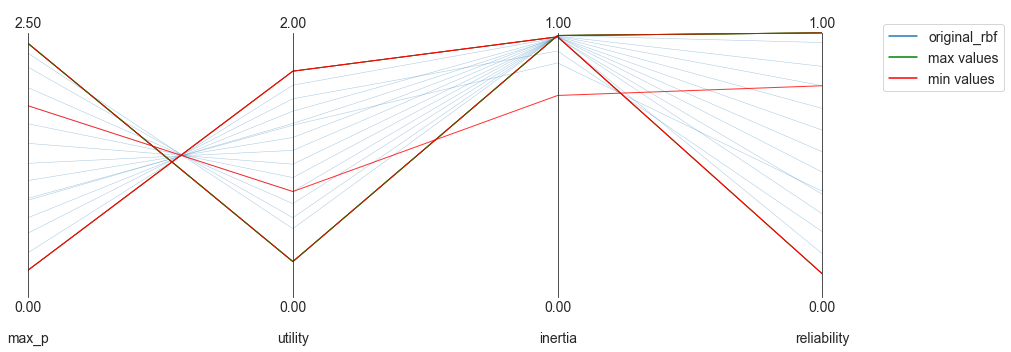

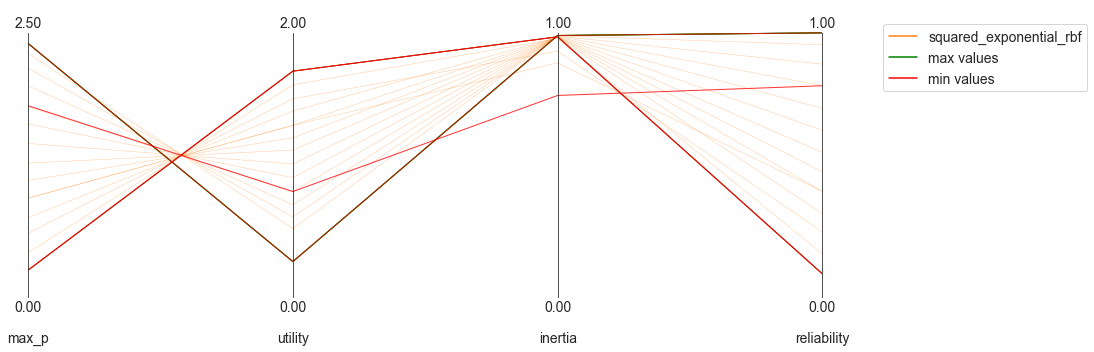

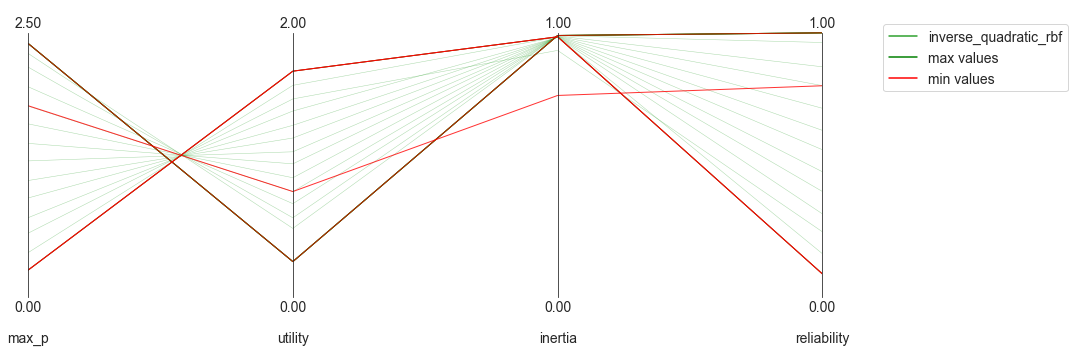

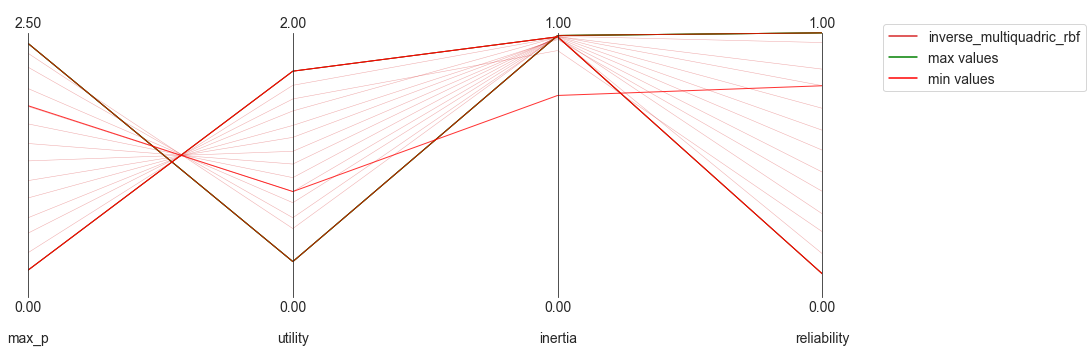

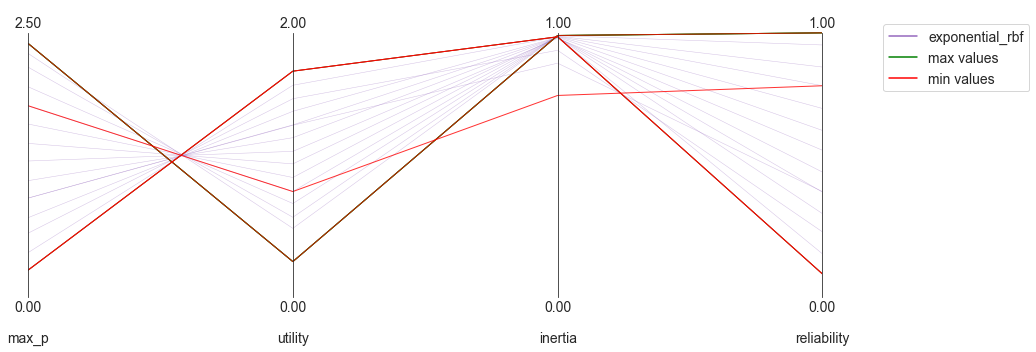

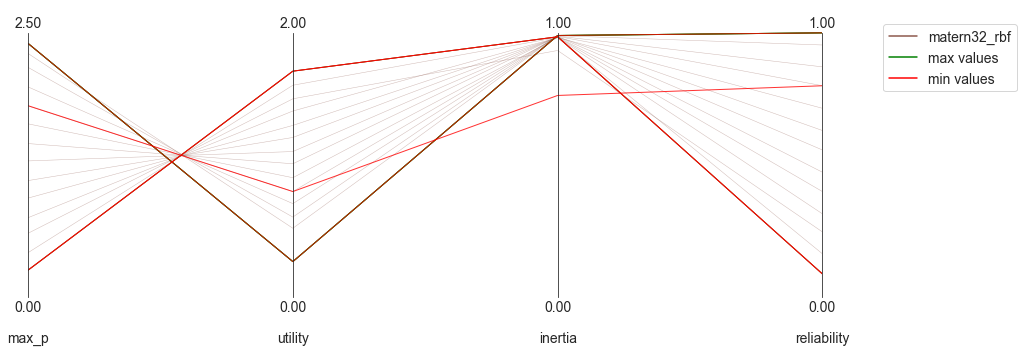

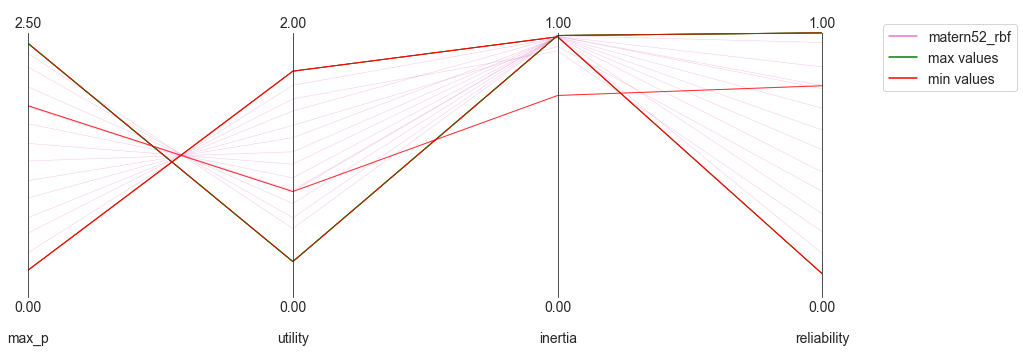

In [9]:
# for entry in rbfs:
for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
#     name = entry.__name__
    df_rbf = pareto_sets[name].copy()
    df_max = pd.DataFrame(columns=df_rbf.columns)
    df_min = pd.DataFrame(columns=df_rbf.columns)
    for i in df_rbf.idxmax():
        df_max = df_max.append(df_rbf.loc[i])
    for i in df_rbf.idxmin():
        df_min= df_min.append(df_rbf.loc[i])

    limits = get_limits(df_rbf)
    limits.loc[0] = [0,0,0,0,]
    limits.loc[1] = [2.5,2.0,1,1]
    axes = ParallelAxes(limits, rot=0)    
    axes.plot(v, label=k, lw=0.5, color=c, alpha=0.4)
    axes.plot(df_max, label='max values', lw=1, color='green', alpha=0.8)
    axes.plot(df_min, label='min values', lw=1, color='red', alpha=0.8)
    axes.legend()

# plt.savefig(f'figs/{name}/{name}_parcoords.jpg')


In [10]:
for k, v in pareto_sets.items():
    v['rbf'] = k

combined = pd.concat(pareto_sets.values())    
combined.head()

,max_p,utility,inertia,reliability,rbf
0,2.307530,0.519434,0.9900,1.0000,original_rbf
1,1.455476,1.006834,0.9841,0.6322,original_rbf
2,1.104125,1.208910,0.9848,0.4733,original_rbf
3,2.176428,0.601904,0.9895,0.9634,original_rbf
4,0.935651,1.301410,0.8863,0.4008,original_rbf


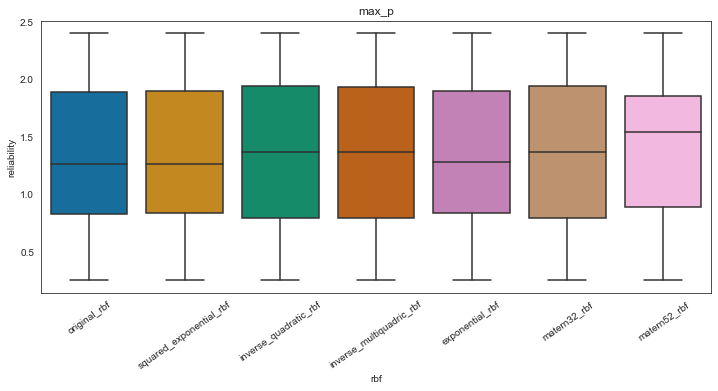

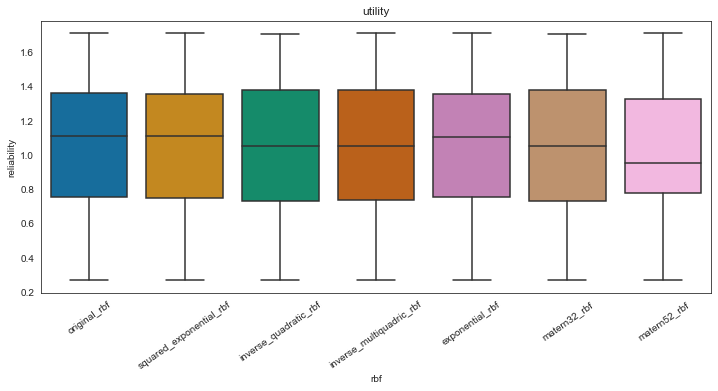

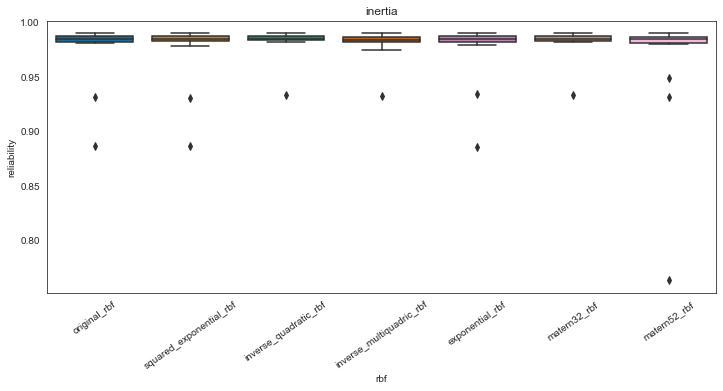

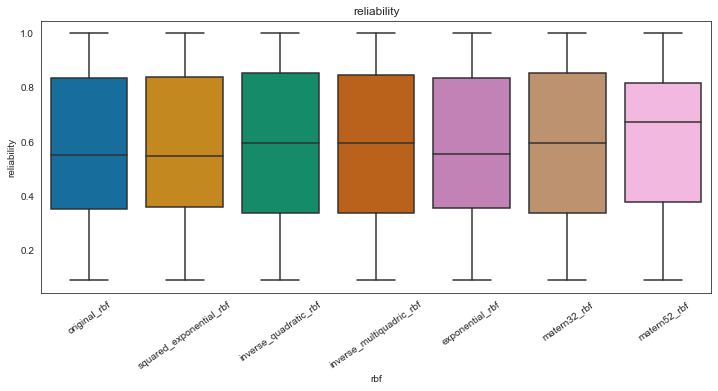

In [11]:
l=[]
for n in rbfs:
    l.append(n.__name__)

for entry in combined.columns[0:-1]:
    data = combined[[entry, 'rbf']]
    sns.boxplot(data=data, y=entry,x='rbf', order=l, palette = "colorblind")
    plt.title(entry)
    plt.ylabel("reliability")
    plt.xticks(rotation=35)
    plt.show()

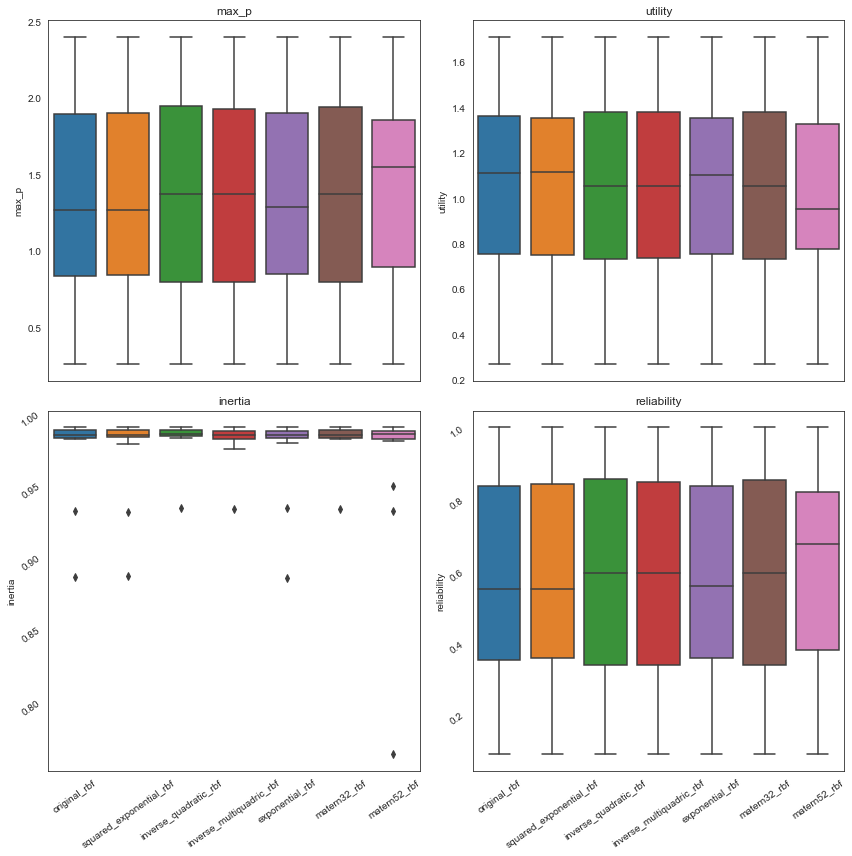

In [12]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12,12))

x=0
for i, entry in enumerate(combined.columns[0:-1]):
    x = i/2
    data = combined[[entry, 'rbf']]
    if i%2:
        sns.boxplot(ax=ax[int(x),1], data=data, y=entry, x='rbf', order=l)
        ax[int(x),1].set_title(entry)
        #ax[int(x),1].set_ylabel("Reliability")
        ax[int(x),1].set_xlabel(None)
    else:
        sns.boxplot(ax=ax[int(x),0], data=data, y=entry, x='rbf', order=l)
        ax[int(x),0].set_title(entry)
        ax[int(x),0].set_xlabel(None)
    ax[1,0].tick_params(labelrotation=35)
    ax[1,1].tick_params(labelrotation=35)
fig.tight_layout()
plt.savefig(f'../figs/box_plots_compare.png')
plt.savefig(f'../figs/box_plots_compare.pdf')